In [29]:
import pickle
import os
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt

In [5]:
# 加载观测数据
observation = sio.loadmat('../data_target_01/observation_3h.mat')

In [6]:
# 加载模式数据
ec_axis = sio.loadmat('../data_target_01/ec_axis_3h.mat')
ec_variables = sio.loadmat('../data_target_01/ec_variables_3h.mat')

In [8]:
observation.keys()

dict_keys(['__header__', '__version__', '__globals__', 'time', 'velocity', 'degree'])

In [9]:
ec_axis.keys()

dict_keys(['__header__', '__version__', '__globals__', 'time'])

In [10]:
ec_variables.keys()

dict_keys(['__header__', '__version__', '__globals__', 'uwnd', 'vwnd', 'temp', 'rhum', 't2mm', 'u10m', 'v10m', 't2md', 'velocity10m', 'degree10m'])

In [11]:
# 时间轴
time_observation = observation['time'].squeeze()
time_ec = ec_axis['time'].squeeze()

In [12]:
# 找出都有的时间范围
common_times = pd.merge(pd.DataFrame({'time': time_observation}),  
                        pd.DataFrame({'time': time_ec}),  
                        on='time', how='inner')['time']  

In [13]:
common_times.shape

(2432,)

In [14]:
time_observation.shape

(2680,)

In [15]:
time_ec.shape

(2680,)

In [16]:
pd.to_datetime(common_times)

0      2023-09-01 00:00:00
1      2023-09-01 03:00:00
2      2023-09-01 06:00:00
3      2023-09-01 09:00:00
4      2023-09-01 12:00:00
               ...        
2427   2024-06-30 09:00:00
2428   2024-06-30 12:00:00
2429   2024-06-30 15:00:00
2430   2024-06-30 18:00:00
2431   2024-06-30 21:00:00
Name: time, Length: 2432, dtype: datetime64[ns]

In [17]:
# 转格式
time_observation_ = pd.to_datetime(time_observation)  
time_ec_ = pd.to_datetime(time_ec)  
common_times_ = pd.to_datetime(common_times)
# 取索引
indices_observation = np.where(time_observation_.isin(common_times_))[0]
indices_ec = np.where(time_ec_.isin(common_times_))[0]

In [18]:
indices_ec

array([ 248,  249,  250, ..., 2677, 2678, 2679], dtype=int64)

In [19]:
indices_observation

array([   0,    1,    2, ..., 2429, 2430, 2431], dtype=int64)

In [20]:
# 截取时间轴
time_axis = time_ec[indices_ec]

In [22]:
# 截取数据---观测
observation_velocity = observation['velocity'].squeeze()[indices_observation]
observation_degree = observation['degree'].squeeze()[indices_observation]

In [23]:
observation_degree.shape

(2432,)

In [24]:
observation_velocity.shape

(2432,)

In [25]:
ec_variables.keys()

dict_keys(['__header__', '__version__', '__globals__', 'uwnd', 'vwnd', 'temp', 'rhum', 't2mm', 'u10m', 'v10m', 't2md', 'velocity10m', 'degree10m'])

In [26]:
# 截取数据---EC
variables = ['uwnd', 'vwnd', 'temp', 'rhum', 't2mm', 'u10m', 'v10m', 't2md', 'velocity10m', 'degree10m']
for variable in variables:
    ec_variables[variable] = ec_variables[variable].squeeze()[indices_ec]

In [27]:
ec_variables['uwnd'].shape

(2432,)

In [28]:
# 保存时间轴及数据
sio.savemat('../data_target_01/axis_target.mat', {'time_axis': time_axis})
sio.savemat('../data_target_01/observation_target.mat', {'velocity': observation_velocity, 'degree': observation_degree})
sio.savemat('../data_target_01/ec_target.mat', ec_variables)

## 绘图对比

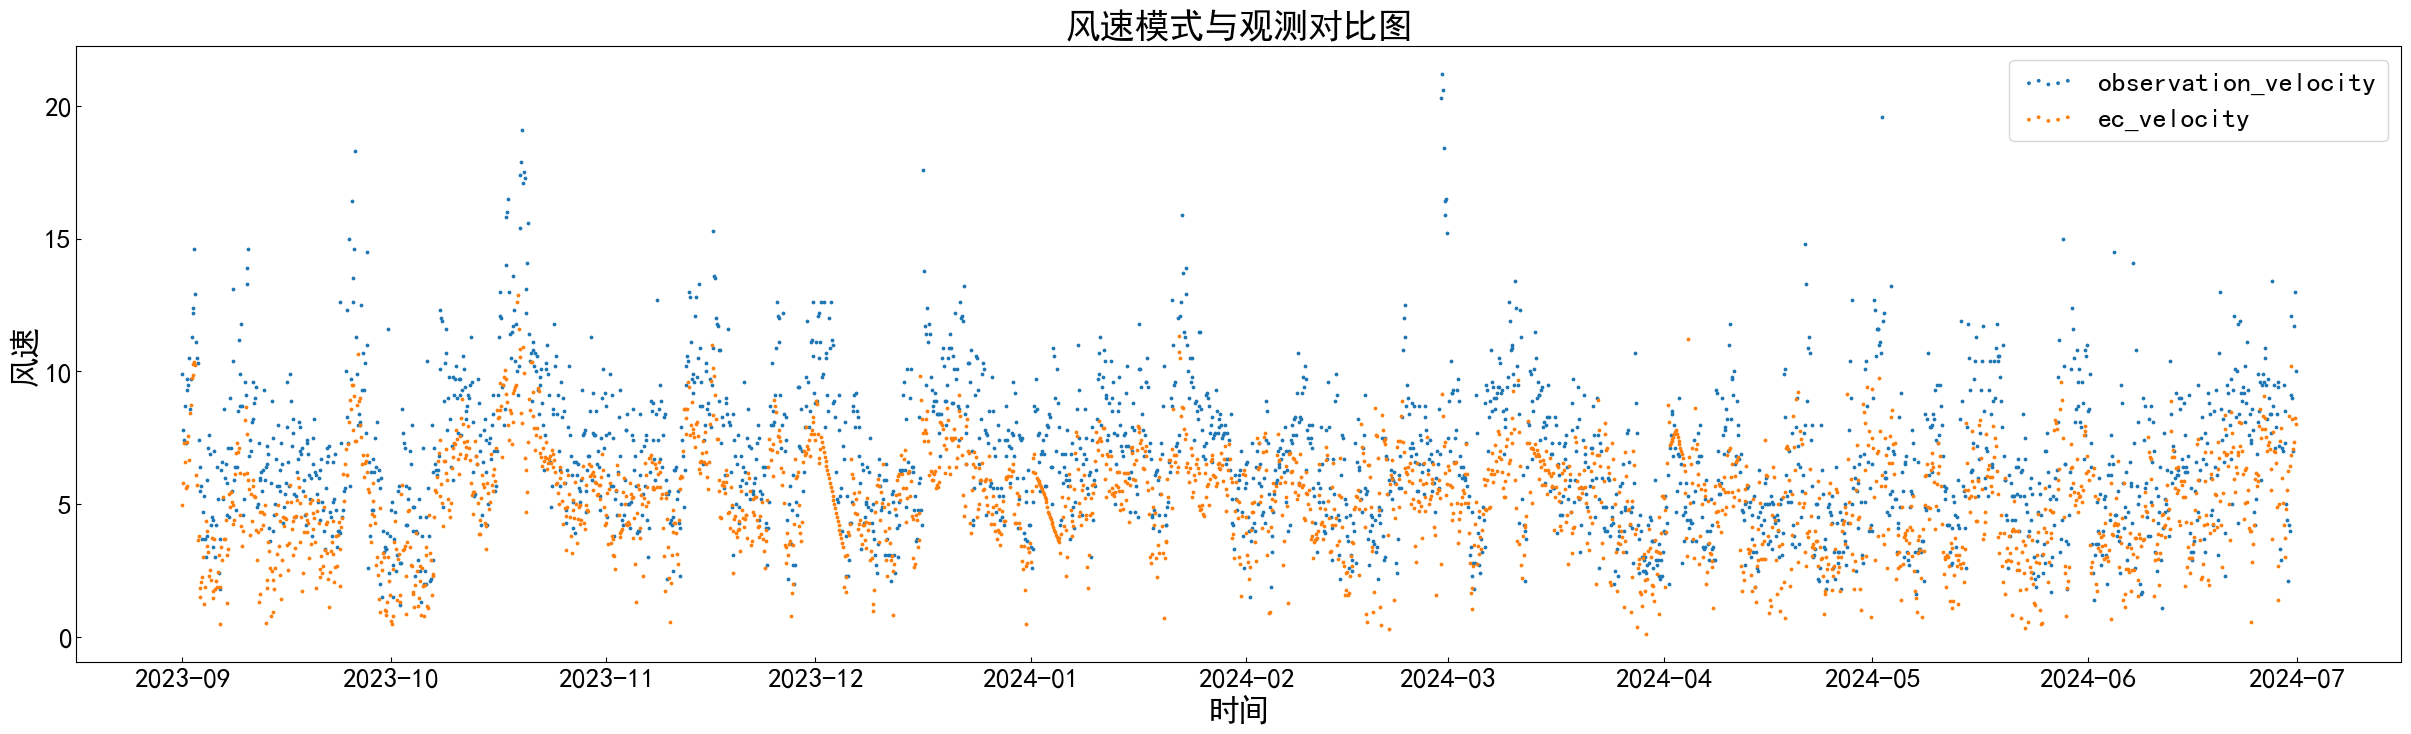

In [32]:
# 绘图
# 
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
size = 3
line_width = 1

plt.figure(figsize=(30, 8))

plt.scatter(pd.to_datetime(time_axis), observation_velocity, linewidth = line_width, s=size, label='observation_velocity')
plt.scatter(pd.to_datetime(time_axis), ec_variables['velocity10m'], linewidth = line_width, s=size, label='ec_velocity')
plt.tick_params(direction='in', labelsize=20)
plt.xlabel('时间', fontsize=22)
plt.ylabel('风速', fontsize=22)
plt.legend(scatterpoints = 5, loc='upper right', fontsize=20)
plt.title('风速模式与观测对比图', fontsize=25)
plt.show()